In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy, math


# In this section, we read the data, which includes three variables: TV, Radio, and Newspaper, with the output being sales based on these three variables   

In [96]:
df=pd.read_csv("D:\data_advertising.csv")
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5



# In the section below, we have plotted the sales chart against each of the three inputs, namely the amount of advertising in TV, Radio, and Newspaper

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

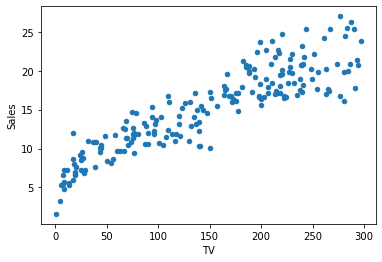

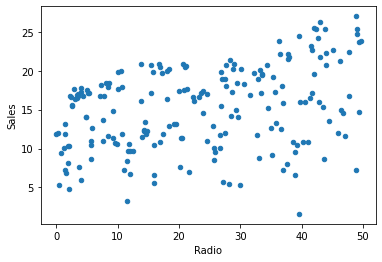

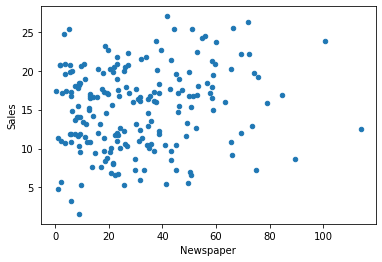

In [97]:
df.plot(x='TV',y='Sales',kind='scatter')
df.plot(x='Radio',y='Sales',kind='scatter')
df.plot(x='Newspaper',y='Sales',kind='scatter')


# Now, we divide the data into two parts: the output, which is the sales vector, and the input, which is the matrix of TV, Radio, and Newspaper

In [98]:
x_train=df.loc[:,['TV','Radio','Newspaper']]
x_train=x_train.to_numpy()
x_train

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [99]:
y_train=df.loc[:,['Sales']]
y_train=y_train.to_numpy()
y_train

array([[22.1],
       [10.4],
       [12. ],
       [16.5],
       [17.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [15.6],
       [12.6],
       [17.4],
       [ 9.2],
       [13.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [17.5],
       [ 5.6],
       [20.5],
       [ 9.7],
       [17. ],
       [15. ],
       [20.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [13.2],
       [17.4],
       [11.9],
       [17.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [17.9],
       [ 8.5],
       [16.1],
       [10.6],
       [23.2],
       [19.8],
       [ 9.7],
       [16.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [20.7],
       [14. ],
       [16. ],
       [11.3],
       [11

# This function takes the input matrix values and provides us with the output vector

In [100]:
def prediction_function(x, w, w_0): 
    p = np.dot(x, w) + w_0    
    return p  

# This function provides the error of the prediction function compared to the actual values.

In [101]:
def error_function(x, y, w, w_0): 
  
    cost = 0
    for i in range(x.shape[0]):                                
        f = np.dot(x[i], w) + w_0  
        cost = cost + (f - y[i])**2       
    cost = cost / (2 * x.shape[0])                      
    return cost

# This function calculates the derivative of the error function

In [102]:
def gradient_function(x,y,w,w_0): 
    m,n = x.shape          
    dw = np.zeros((n,))
    dw_0 = 0.
   
    
    
    
    

    for i in range(m):                             
        z = (np.dot(x[i], w) + w_0) - y[i]   
        for j in range(n):                         
            dw[j] = dw[j] + z * x[i, j]    
        dw_0 = dw_0 + z                        
    dw = dw / m                                
    dw_0 = dw_0 / m  
    
    return dw_0,dw
    
    
    
   

# In this function, we compute the values of the weight coefficients and also return the final error value.

In [103]:
def gradient_descent_function(x,y,w,w_0,alpha,iteration): 
    
    error = []
    for i in range(iteration):
            dw_0,dw = gradient_function(x, y, w, w_0)
            w = w - alpha * dw              
            w_0 = w_0 - alpha * dw_0 
        
        
            if i<iteration:     
                error.append( error_function(x, y, w, w_0))
                
           
            
            

    print(error[iteration-1])
    return w, w_0 
        

# Now, in the section below, we find the values of the weight coefficients. Then, using the prediction function, we generate the output values and compare them with the actual values in the chart. The orange points represent the actual values, and the blue points represent the values predicted by us. Additionally, the error of the function is 5.45937105

In [104]:
w_0=0
w=np.zeros((x_train.shape[1],))
w,w_0=gradient_descent_function(x_train,y_train,w,w_0,5.0e-7,1000)
p=prediction_function(x_train,w,w_0)

[5.45937105]


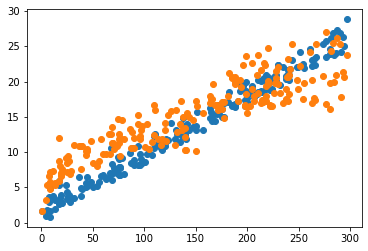

In [105]:
plt.scatter(x_train[:,:1],p)
plt.scatter(x_train[:,:1],y_train)

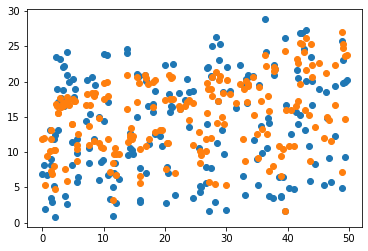

In [106]:
plt.scatter(x_train[:,1:2],p)
plt.scatter(x_train[:,1:2],y_train)

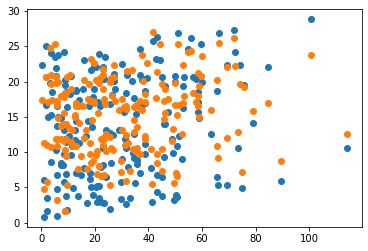

In [107]:

plt.scatter(x_train[:,2:3],p)
plt.scatter(x_train[:,2:3],y_train)

# Finally, we compare the predicted output values with the actual output values side by side

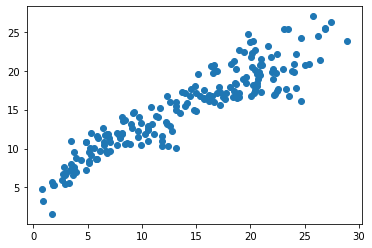

In [116]:
plt.scatter(p,y_train)